In [1]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing import image

import tensorflow.keras.backend as K
import random


import tensorflow as tf

from PIL import Image
# import matplotlib.pyplot as plt
import numpy as np
import random


In [2]:
SIZE = 224
batch_size = 15

In [3]:
# Data augmentation generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # zoom_range=0.2,
    brightness_range=[0.88,1.0],
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # rotation_range=20)
    # zoom_range=0.2,
    horizontal_flip=True)

# Original images generator
original_datagen = ImageDataGenerator(rescale=1./255)

# Generate augmented images from the original data directory
train_generator = train_datagen.flow_from_directory(
    "../../Images/BottleStoodUp_atNight/Positive/",
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input')

# Generate original images from the original data directory
original_generator = original_datagen.flow_from_directory(
    "../../Images/BottleStoodUp_atNight/Positive/",
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input')

# Combine the generators using the `keras.preprocessing.image.Iterator` class
combined_generator = zip(train_generator, original_generator)



Found 179 images belonging to 1 classes.
Found 179 images belonging to 1 classes.


In [5]:
print(len(original_generator))
print(len(train_generator))

12
12


In [42]:
(augmented_images_batch, original_images_batch) = next(combined_generator)
# print("FOR THE AUGMENTED IMAGES")
# print(type(augmented_images_batch))
# print(len(augmented_images_batch))
# print(tf.reduce_min(augmented_images_batch), tf.reduce_max(augmented_images_batch))
# print("FOR THE ORIGINAL IMAGES")
# print(type(original_images_batch))
# print(len(original_images_batch))
# print(tf.reduce_min(original_images_batch), tf.reduce_max(original_images_batch))

One sample of the augmented images
2
(15, 224, 224, 3)


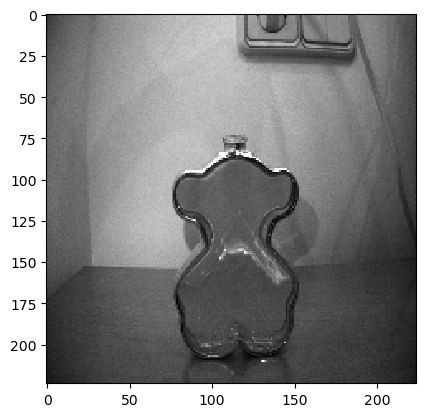

In [43]:
print("One sample of the augmented images")
print(len(augmented_images_batch))
input_batch_augmented = augmented_images_batch[0]
print(input_batch_augmented.shape)
single_img = input_batch_augmented[0]
pyplot.imshow(single_img)

One sample of the original images
2
(15, 224, 224, 3)


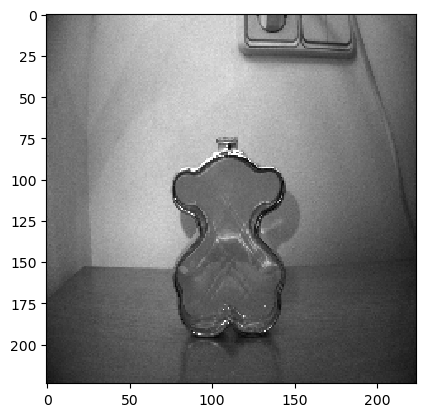

In [44]:
print("One sample of the original images")
print(len(original_images_batch))
input_batch_original = original_images_batch[0]
print(input_batch_original.shape)
single_img_orgn = input_batch_original[0]
pyplot.imshow(single_img_orgn)

Showing multiple augmented images

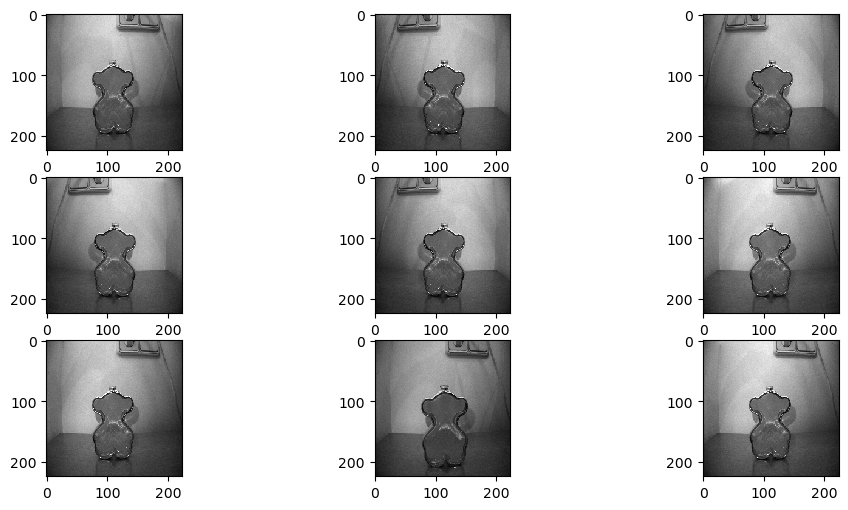

In [45]:
pyplot.figure(figsize=(12, 6))
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	(augmented_images_batch, _) = next(combined_generator)
	input_batch_augmented = augmented_images_batch[0]
	single_img = input_batch_augmented[0]
	# plot raw pixel data
	pyplot.imshow(single_img)
# show the figure
pyplot.show()